In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FixedFormatter, FuncFormatter
import seaborn as sns

import statsmodels as sm
from statsmodels.api import OLS
from scipy.stats import linregress

In [2]:
bnbsf = pd.read_csv('airbnb_san_francisco.csv')

In [3]:
bnbsf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7072 non-null   int64  
 1   neighbourhood          7072 non-null   object 
 2   latitude               7072 non-null   float64
 3   longitude              7072 non-null   float64
 4   room_type              7072 non-null   object 
 5   price                  7072 non-null   int64  
 6   days_occupied_in_2018  2999 non-null   float64
 7   minimum_nights         7072 non-null   int64  
 8   number_of_reviews      7072 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 497.4+ KB


In [4]:
bnbsf.head()

,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2018,minimum_nights,number_of_reviews
0,958,Western Addition,37.769310,-122.433856,Entire home/apt,170,213.0,1,172
1,5858,Bernal Heights,37.745112,-122.421018,Entire home/apt,235,0.0,30,112
2,7918,Haight Ashbury,37.766690,-122.452505,Private room,65,0.0,32,17
3,8142,Haight Ashbury,37.764872,-122.451828,Private room,65,0.0,32,8
4,8339,Western Addition,37.775249,-122.436374,Entire home/apt,785,276.0,7,27


## Question 1

**1a)** Which neighborhoods made the most money?

**1b)** Which neighborhoods received the most reviews? 

**1c)** Which neighborhoods had the most cumulative days occupied at AirBnB's therein?

**1d)** Which neighborhoods had the most stay transactions?

**1e)** Which neighborhood(s) appear to be the most popular, given all four criteria (money, reviews, days spent, transactions)?

## Answers

**1a)** In order: Mission, Western Addition, South of Market, Castro/Upper Market, and Downtown/Civic Center generated the most money from AirBnB. Mission was the top-selling neighborhood in terms of AirBnB stays, with \$153,201.00.

**1b)** In order: Mission, Western Addition, Bernal Heights, Castro/Upper Market, and Outer Sunset received the most reviews for AirBnB stays. Mission received the most AirBnb stay reviews with 34,412.

**1c)** In order: Mission, Bernal Heights, Western Addition, Castro/Upper Market, and Noe Valley had the most cumulative days occupied at AirBNB's therein. Mission had the highest number of cumulative days occupied with 69,595.

**1d)** In order: Mission, South of Market, Western Addition, Downtown/Civic Center and Castro/Upper Market had the most stay transactions. Mission had the highest number of stay transactions with 725.

**1e)** Altogether it appears that Mission is the most popular neighborhood for AirBnB stays, followed closely by Western Addition.

In [5]:
phighest = bnbsf.groupby(by='neighbourhood').sum().sort_values('price', ascending=False)[:5]
phighest

,id,latitude,longitude,price,days_occupied_in_2018,minimum_nights,number_of_reviews
neighbourhood,,,,,,,
Mission,9870990032,27374.873931,-88752.547740,153201,69595.0,11027,34412
Western Addition,8762914925,21646.897480,-70154.647396,146759,35935.0,9982,23098
South of Market,12524388296,23157.858685,-75033.277961,118229,19070.0,18096,8663
Castro/Upper Market,5510330154,15029.436394,-48728.949875,91886,35318.0,5691,20503
Downtown/Civic Center,8455133538,17948.461524,-58146.209568,81147,18971.0,6374,10691


In [6]:
rhighest = bnbsf.groupby(by='neighbourhood').sum().sort_values('number_of_reviews', ascending=False)[:5]
rhighest

,id,latitude,longitude,price,days_occupied_in_2018,minimum_nights,number_of_reviews
neighbourhood,,,,,,,
Mission,9870990032,27374.873931,-88752.547740,153201,69595.0,11027,34412
Western Addition,8762914925,21646.897480,-70154.647396,146759,35935.0,9982,23098
Bernal Heights,4668015250,14303.979128,-46395.713283,66913,38615.0,3480,20635
Castro/Upper Market,5510330154,15029.436394,-48728.949875,91886,35318.0,5691,20503
Outer Sunset,4482255042,10156.623786,-32950.889465,38481,25279.0,2720,18627


In [7]:
dhighest = bnbsf.groupby(by='neighbourhood').sum().sort_values('days_occupied_in_2018', ascending=False)[:5]
dhighest

,id,latitude,longitude,price,days_occupied_in_2018,minimum_nights,number_of_reviews
neighbourhood,,,,,,,
Mission,9870990032,27374.873931,-88752.547740,153201,69595.0,11027,34412
Bernal Heights,4668015250,14303.979128,-46395.713283,66913,38615.0,3480,20635
Western Addition,8762914925,21646.897480,-70154.647396,146759,35935.0,9982,23098
Castro/Upper Market,5510330154,15029.436394,-48728.949875,91886,35318.0,5691,20503
Noe Valley,4249479448,11929.036257,-38688.675351,75065,28740.0,100004179,16615


In [8]:
bnbsf.groupby(['neighbourhood'])[['id']].agg('count').sort_values('id', ascending=False)[:5]

,id
neighbourhood,
Mission,725
South of Market,613
Western Addition,573
Downtown/Civic Center,475
Castro/Upper Market,398


## Question 2

**2a)** Which neighborhoods made the least money?

**2b)** Which neighborhoods received the fewest reviews? 

**2c)** Which neighborhoods had the fewest cumulative days occupied at AirBnB's therein?

**2d)** Which neighborhoods had the fewest stay transactions?

**2e)** Which neighborhood(s) appear to be the least popular, given all four criteria (money, reviews, days spent, stay transactions)?

## Answers

**2a)** In order: Presidio, Golden Gate Park, Crocker Amazon, Lakeshore and Seacliff generated the least money from AirBnB. Presidio was the lowest-selling neighborhood in terms of AirBnB stays, with \$105.00.

**2b)** In order: Presidio, Golden Gate Park, Chinatown, Presidio Heights and Seacliff received the fewest reviews for AirBnB stays. Presidio received the fewest AirBnb stay reviews with 217.

**2c)** In order: Presidio, Golden Gate Park, Diamond Heights, Presidio Heights, and Seacliff had the fewest cumulative days occupied at AirBNB's therein. Presidio had the lowest number of cumulative days occupied with 23.

**2d)** In order: Presidio, Golden Gate Park, Diamond Heights, Seacliff, and Presidio Heights had the fewest stay transactions. Presidio had the lowest number of stay transactions with 1 single transaction.

**2e)** Altogether it appears that Presidio is the least popular neighborhood for AirBnB stays, followed closely by Golden Gate Park.

In [9]:
plowest = bnbsf.groupby(by='neighbourhood').sum().sort_values('price', ascending=True)[:5]
plowest

,id,latitude,longitude,price,days_occupied_in_2018,minimum_nights,number_of_reviews
neighbourhood,,,,,,,
Presidio,3093543,37.810306,-122.476422,105,23.0,5,217
Golden Gate Park,22326394,226.615625,-734.917346,1727,571.0,229,440
Crocker Amazon,855260593,1659.268028,-5387.460390,4905,3106.0,482,1934
Lakeshore,1131874893,2075.205486,-6736.604204,6390,2923.0,680,1714
Seacliff,290842784,793.423539,-2572.514540,7648,2476.0,301,1277


In [10]:
rlowest = bnbsf.groupby(by='neighbourhood').sum().sort_values('number_of_reviews', ascending=True)[:5]
rlowest

,id,latitude,longitude,price,days_occupied_in_2018,minimum_nights,number_of_reviews
neighbourhood,,,,,,,
Presidio,3093543,37.810306,-122.476422,105,23.0,5,217
Golden Gate Park,22326394,226.615625,-734.917346,1727,571.0,229,440
Chinatown,2043375586,4421.706115,-14321.655025,20602,5409.0,2347,851
Presidio Heights,363849515,1095.780844,-3551.129864,10307,2251.0,466,1235
Seacliff,290842784,793.423539,-2572.514540,7648,2476.0,301,1277


In [11]:
dlowest = bnbsf.groupby(by='neighbourhood').sum().sort_values('days_occupied_in_2018', ascending=True)[:5]
dlowest

,id,latitude,longitude,price,days_occupied_in_2018,minimum_nights,number_of_reviews
neighbourhood,,,,,,,
Presidio,3093543,37.810306,-122.476422,105,23.0,5,217
Golden Gate Park,22326394,226.615625,-734.917346,1727,571.0,229,440
Diamond Heights,216797206,679.373336,-2203.954738,12640,1973.0,109,1294
Presidio Heights,363849515,1095.780844,-3551.129864,10307,2251.0,466,1235
Seacliff,290842784,793.423539,-2572.514540,7648,2476.0,301,1277


In [12]:
bnbsf.groupby(['neighbourhood'])[['id']].agg('count').sort_values('id', ascending=True)[:5]

,id
neighbourhood,
Presidio,1
Golden Gate Park,6
Diamond Heights,18
Seacliff,21
Presidio Heights,29


## Question 3

**3a)** What combinations of neighborhood and room type made the most money?

**3b)** What room type is generally the most lucrative?

## Answer

**3a)** Customers tend to prefer entire homes and/or apartments in Mission, Western Addition, South of Market, Castro/Upper Market and Noe Valley, with entire homes or apartments in Mission being the highest-selling AirBnB stays at \$117,655.

**3b)** Customers generally prefer entire homes and apartments by a significant margin, followed by private rooms and shared rooms. 

Entire home/apartment stays generated \$1,156,525 in San Francisco in 2018. 

Private room stays generated \$335,661. 

Shared room stays generated \$14,107.

In [13]:
bnbsf.groupby(['neighbourhood', 'room_type'])[['price']].agg('sum').sort_values('price', ascending=False)[:5]

,,price
neighbourhood,room_type,
Mission,Entire home/apt,117655
Western Addition,Entire home/apt,116064
South of Market,Entire home/apt,95245
Castro/Upper Market,Entire home/apt,74494
Noe Valley,Entire home/apt,62308


In [14]:
rthighest = bnbsf.groupby(by='room_type').sum().sort_values('price', ascending=False)[:5]
rthighest

,id,latitude,longitude,price,days_occupied_in_2018,minimum_nights,number_of_reviews
room_type,,,,,,,
Entire home/apt,67447160264,164893.181968,-534526.719719,1156525,322036.0,81607,153020
Private room,39304878172,95313.200186,-309022.163892,335661,208345.0,100027212,144389
Shared room,3014391384,6874.415554,-22281.056570,14107,14151.0,4917,8434


## Question 4

Show the highest average price per night for entire homes/apartments by neighborhood with a chart.

## Answer

I created a bar chart below showing the highest average price per night per neighbourhood. The neighbourhood of Diamond Heights has the highest average price per night at \$1160.60. 

As a note, it does not strike me as a coincidence that three of the neighborhoods with the highest average price per night (Diamond Heights, Seacliff and Presidio Heights) also feature in the prior analysis of neighborhoods with the lowest popularity in terms of total money generated, total number of reviews received and total number of days spent there.

In [15]:
hprice_per_night = bnbsf[bnbsf['room_type'] == "Entire home/apt"].groupby(by=['neighbourhood']).mean().sort_values('price', ascending=False)[:5]
hprice_per_night

,id,latitude,longitude,price,days_occupied_in_2018,minimum_nights,number_of_reviews
neighbourhood,,,,,,,
Diamond Heights,1.259038e+07,37.741146,-122.440970,1160.600000,136.000000,8.700000,56.200000
Russian Hill,1.568828e+07,37.801186,-122.418836,456.966387,158.361702,21.521008,26.663866
Seacliff,1.223032e+07,37.781805,-122.500385,453.333333,111.285714,18.916667,68.916667
Presidio Heights,1.478079e+07,37.786126,-122.452932,433.136364,209.625000,16.636364,33.500000
Pacific Heights,1.406196e+07,37.792633,-122.432994,399.688073,176.816327,28.633028,23.211009


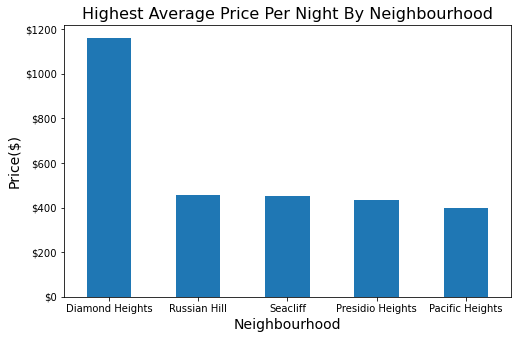

In [16]:
ax = hprice_per_night['price'].plot(kind='bar', figsize=(8,5), rot=0)
ax.set_title('Highest Average Price Per Night By Neighbourhood', size=16)
ax.set_ylabel('Price($)', size=14)
ax.set_xlabel('Neighbourhood',size=14)
ax.yaxis.set_major_formatter('${x:1.0f}')
ax.yaxis.set_tick_params(which='major')

## Question 5

Show the lowest average price per night for entire homes/apartments by neighborhood with a chart.

## Answer

My bar chart below shows the lowest average price per night per neighbourhood. The neighbourhood of Visitacion Valley has the lowest average price per night at \$151.26. 

Similar to my analysis of the highest average prices per night above: It is likewise interesting to me that two of the neighborhoods with the lowest average price per night (Chinatown and Crocker Amazon) also feature in the prior analysis of neighborhoods with the lowest popularity. Specifically: Chinatown had the third lowest number of reviews, and Crocker Amazon generated the third-lowest sales for San Francisco AirBnB stays in 2018.

In [17]:
lprice_per_night = bnbsf[bnbsf['room_type'] == "Entire home/apt"].groupby(by=['neighbourhood']).mean().sort_values('price', ascending=True)[:5]
lprice_per_night

,id,latitude,longitude,price,days_occupied_in_2018,minimum_nights,number_of_reviews
neighbourhood,,,,,,,
Visitacion Valley,1.950757e+07,37.716735,-122.403043,151.257143,205.000000,11.514286,45.742857
Chinatown,1.960029e+07,37.792204,-122.407748,158.000000,195.083333,24.955882,8.088235
Crocker Amazon,1.826915e+07,37.711007,-122.440815,172.294118,148.625000,8.529412,35.294118
Excelsior,1.567591e+07,37.724486,-122.424943,178.117647,201.809524,6.632353,58.838235
Bayview,1.647657e+07,37.729688,-122.391191,179.913793,178.833333,16.362069,48.396552


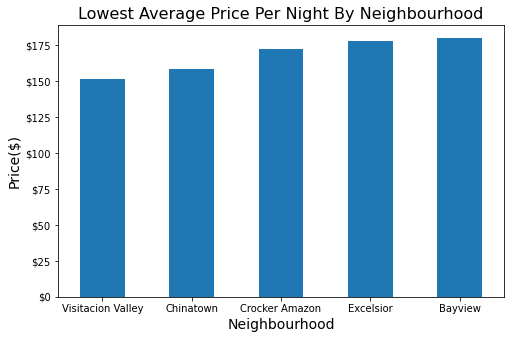

In [18]:
ax = lprice_per_night['price'].plot(kind='bar', figsize=(8,5), rot=0)
ax.set_title('Lowest Average Price Per Night By Neighbourhood', size=16)
ax.set_ylabel('Price($)', size=14)
ax.set_xlabel('Neighbourhood',size=14)
ax.yaxis.set_major_formatter('${x:1.0f}')
ax.yaxis.set_tick_params(which='major')

## Question 6

Compare the mean prices of the most popular neighbourhoods to those with the lowest and highest mean prices, excluding outliers. 

## Answer

I created three boxplots below showing, in order: the mean prices for the most popular neighbourhoods as analyzed in Question 1; the mean prices for the neighbourhoods with the lowest mean prices; and the mean prices for the neighbourhoods with the highest mean prices. Each boxplot excludes outliers.

The most popular neighbourhoods tended to have mean prices between \$100-200 with upper whiskers around 500 (the exception being Bernal Heights).

The neighborhoods with the lowest overall mean prices, now accounting for outliers, tended to have mean prices around or lower than \$100 with upper whiskers lower than 300 (the exception being Chinatown, with an upper whisker easily above 400).

The neighborhoods with the highest overall mean prices at or below \$200 with upper whiskers ranging between 500 and 700 (the exception being Seacliff, with its upper whisker near 200 and its mean near 100).

**NOTE:** This analysis of price appears to indicate that the number of reviews received does not necessarily indicate popularity. Specifically: Chinatown received the third lowest number of reviews, yet its price numbers are easily comparable to those of the most popular neighbourhoods.

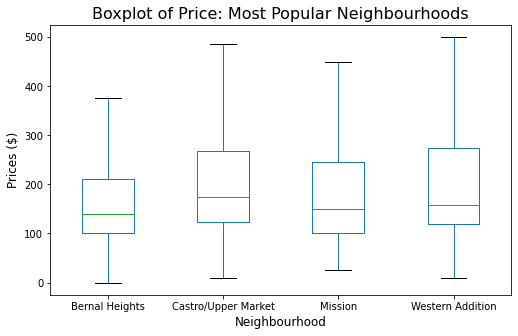

In [19]:
neighbourhoods = bnbsf[bnbsf['neighbourhood'].isin(['Mission', 'Western Addition', 'Bernal Heights', 'Castro/Upper Market'])]
newax = neighbourhoods.boxplot('price', by='neighbourhood', rot=0, showfliers=False, grid=False, figsize=(8,5))
newax.set_title('Boxplot of Price: Most Popular Neighbourhoods', size=16)
plt.suptitle('')
newax.set_xlabel('Neighbourhood', size=12)
newax.set_ylabel('Prices ($)', size=12);

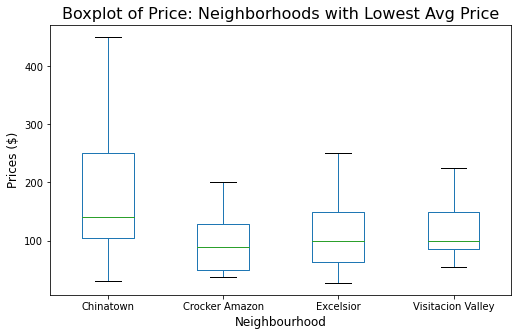

In [20]:
lowestavg_neighbourhoods = bnbsf[bnbsf['neighbourhood'].isin(['Visitacion Valley', 'Chinatown', 'Crocker Amazon', 'Excelsior'])]
lowestavg = lowestavg_neighbourhoods.boxplot('price', by='neighbourhood', rot=0, showfliers=False, grid=False, figsize=(8,5))
lowestavg.set_title('Boxplot of Price: Neighborhoods with Lowest Avg Price', size=16)
plt.suptitle('')
lowestavg.set_xlabel('Neighbourhood', size=12)
lowestavg.set_ylabel('Prices ($)', size=12);

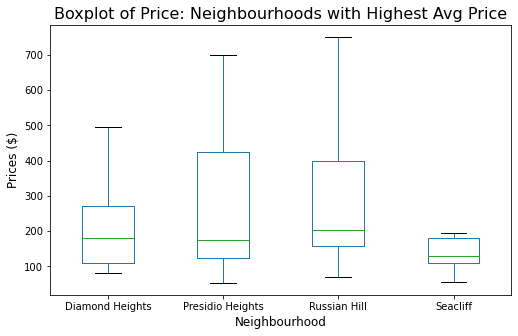

In [21]:
highestavg_neighbourhoods = bnbsf[bnbsf['neighbourhood'].isin(['Diamond Heights', 'Russian Hill', 'Seacliff', 'Presidio Heights'])]
highestavg = highestavg_neighbourhoods.boxplot('price', by='neighbourhood', rot=0, showfliers=False, grid=False, figsize=(8,5))
highestavg.set_title('Boxplot of Price: Neighbourhoods with Highest Avg Price', size=16)
plt.suptitle('')
highestavg.set_xlabel('Neighbourhood', size=12)
highestavg.set_ylabel('Prices ($)', size=12);

## Question 7

Do an exploratory data analysis on the neighborhood of Chinatown. 

## Answer

Chinatown had a total of 117 stay transactions for AirBnB for 2018, and its mean stay price was \$176.09. 

This mean stay price is below San Francisco's Average Purchase Value for AirBnB for 2018, which was \$212.99.

The vast majority of its transactions were around \$100 with some ranging up to a few hundred dollars higher. 

In [22]:
bnbsf.price.mean()

212.99391968325793

In [23]:
Chinatown = bnbsf[(bnbsf.neighbourhood == 'Chinatown')]

In [24]:
Chinatown.price.describe()

count    117.00000
mean     176.08547
std      123.74930
min       30.00000
25%      105.00000
50%      140.00000
75%      250.00000
max      800.00000
Name: price, dtype: float64

C:\Users\cb1550\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


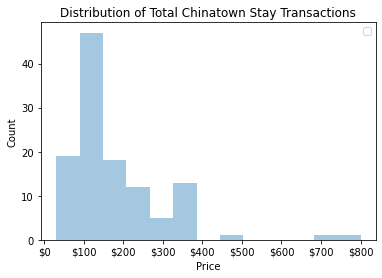

In [25]:
Chinatown_Plot = sns.distplot(Chinatown.price, kde=False)
Chinatown_Plot.set(xlabel='Price', ylabel='Count', title='Distribution of Total Chinatown Stay Transactions')
Chinatown_Plot.xaxis.set_major_formatter('${x:1.0f}')
plt.legend()
plt.show()